___
<h1> Machine Learning </h1>
<h2> M. Sc. in Electrical and Computer Engineering </h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[MEEC](https://ise.ualg.pt/en/curso/1477) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)
___

# Linear models for classification

## Logistic Regression

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np

Let us load the Iris dataset and then restrict our data to the last two target_names

In [2]:
iris = load_iris()

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
idx = (iris.target == 1) + (iris.target == 2)
idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [4]:
iris.data = iris.data[idx]
iris.target = iris.target[idx]
len(iris.target)

100

The usual splitting of the data, and the the fitting and scoring 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, 
    iris.target, 
    random_state=1 # for reproducibility
)

lr = LogisticRegression().fit(x_train, y_train)

lr.score(x_test, y_test)

0.88

The implementation can fit binary, One-vs- Rest, or multinomial logistic regression with optional L2 or L1 regularization.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [6]:
score_l1 = []
score_l2 = []

coefs_l1 = []
coefs_l2 = []

Cs = list(np.arange(0.0001, 20, .25))
for C in Cs:
    # note that C is the Inverse of regularization strength; smaller values specify stronger regularization
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=500).fit(x_train, y_train)
    score_l1.append(lr.score(x_test, y_test))
    coefs_l1.append(lr.coef_[0])

    lr = LogisticRegression(penalty='l2', C=C, solver='liblinear').fit(x_train, y_train)
    score_l2.append(lr.score(x_test, y_test))
    coefs_l2.append(lr.coef_[0])


How does the score behaves when changind the regularization parameter (remeber:  C is the Inverse of regularization strength; smaller values specify stronger regularization)


Text(0.5, 0, 'C')

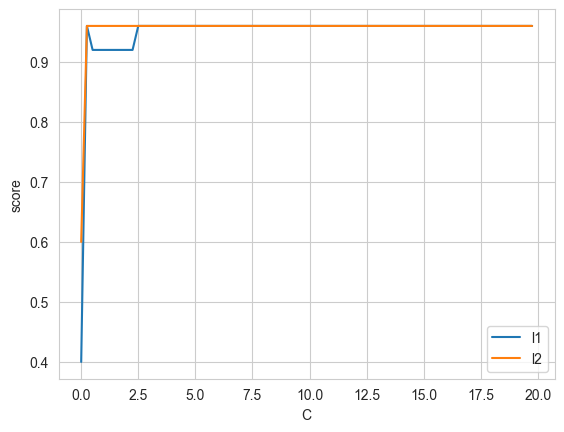

In [7]:
plt.plot(Cs,score_l1)
plt.plot(Cs,score_l2)
plt.legend(["l1", "l2"])
plt.ylabel("score")
plt.xlabel("C")

And, the "$\beta$'s"?

For the l1 regularization:

Text(0, 0.5, 'b_i')

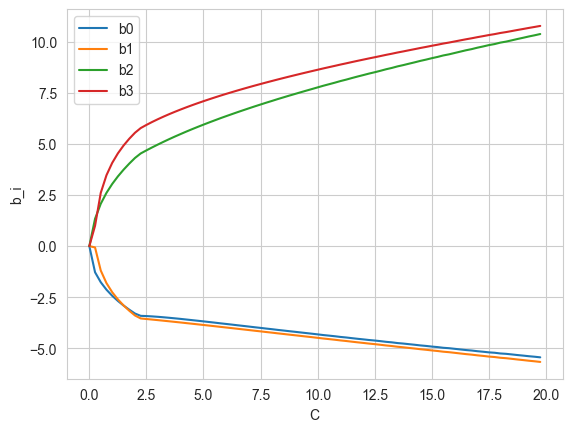

In [8]:
plt.plot(Cs, coefs_l1)
plt.legend(("b0", "b1", "b2", "b3"))
plt.xlabel("C")
plt.ylabel("b_i")

For the l2 regularization:

Text(0, 0.5, 'b_i')

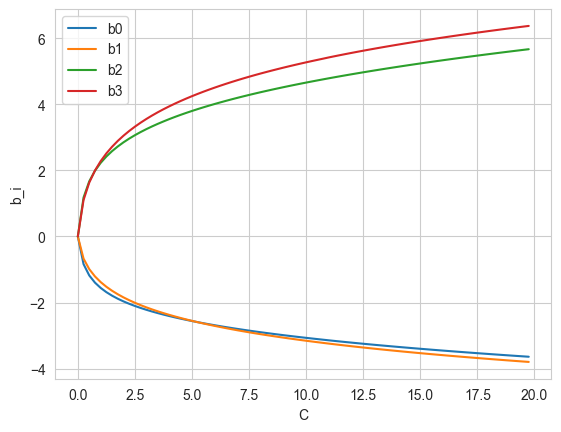

In [9]:
plt.plot(Cs, coefs_l2)
plt.legend(("b0", "b1", "b2", "b3"))
plt.xlabel("C")
plt.ylabel("b_i")